In [ ]:
# GREG SOLAMON PORTFOLIO PROJECT #4:
# Visualizing Spotify Data in Python

# gsolamon@gmail.com


# The dataset being analyzed (33.71 MB) can be found at:
#   <https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db>

# An explanation of the Spotify track features (column names) can be found at:
#   <https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features>



In [111]:
# Importing pandas, numpy, seaborn, and matplotlib libraries.
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read data from local CSV file.
df = pd.read_csv(r'C:\Users\Solamon\Downloads\archive (14)\SpotifyFeatures.csv')




In [138]:
# Initial look at the dataset.

pd.options.display.max_rows = 4000

df.head(100)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,14,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,4,0.3460,-1.828,0,0.0525,166.969,3,0.8140
1,14,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,9,0.1510,-5.559,1,0.0868,174.003,3,0.8160
2,14,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,3,0.1030,-13.879,1,0.0362,99.488,4,0.3680
3,14,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,4,0.0985,-12.178,0,0.0395,171.758,3,0.2270
4,14,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,8,0.2020,-21.150,0,0.0456,140.576,3,0.3900
5,14,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,4,0.1070,-14.970,0,0.1430,87.479,3,0.3580
6,14,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,4,0.1050,-12.675,0,0.9530,82.873,3,0.5330
7,14,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,9,0.1130,-8.949,0,0.0286,96.827,3,0.2740
8,14,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,3,0.0765,-7.725,0,0.0460,125.080,3,0.7650
9,14,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,10,0.3490,-7.790,0,0.0281,137.496,3,0.7180


In [51]:
# Checks for missing information in each column and returns as a percentage.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

genre - 0.0%
artist_name - 0.0%
track_name - 0.0%
track_id - 0.0%
popularity - 0.0%
acousticness - 0.0%
danceability - 0.0%
duration_ms - 0.0%
energy - 0.0%
instrumentalness - 0.0%
key - 0.0%
liveness - 0.0%
loudness - 0.0%
mode - 0.0%
speechiness - 0.0%
tempo - 0.0%
time_signature - 0.0%
valence - 0.0%


In [52]:
# Examines column names and data types.
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [127]:
# Looks at names of all Spotify genres (note that one song can have multiple, but they appear as separate rows in the dataset).
df.genre.unique()

# Notice that 'Children’s Music' and "Children's Music" are distinct genres.

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [137]:
# Rewrites "Children's Music" as 'Children’s Music' to merge the two categories.

df.loc[(df.genre == "Children's Music"), 'genre'] = 'Children’s Music'

df.head(100)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,14,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,4,0.3460,-1.828,0,0.0525,166.969,3,0.8140
1,14,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,9,0.1510,-5.559,1,0.0868,174.003,3,0.8160
2,14,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,3,0.1030,-13.879,1,0.0362,99.488,4,0.3680
3,14,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,4,0.0985,-12.178,0,0.0395,171.758,3,0.2270
4,14,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,8,0.2020,-21.150,0,0.0456,140.576,3,0.3900
5,14,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,4,0.1070,-14.970,0,0.1430,87.479,3,0.3580
6,14,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,4,0.1050,-12.675,0,0.9530,82.873,3,0.5330
7,14,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,9,0.1130,-8.949,0,0.0286,96.827,3,0.2740
8,14,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,3,0.0765,-7.725,0,0.0460,125.080,3,0.7650
9,14,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,10,0.3490,-7.790,0,0.0281,137.496,3,0.7180


In [54]:
# Looks at how popularity is scored by Spotify (out of 100).
df.popularity.unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [55]:
# Looks at min, max, and average values of quantitative columns in dataset.

print('acousticness:')
print(' Min: {}'.format(min(df.acousticness)))
print(' Max: {}'.format(max(df.acousticness)))
print(' Mean: {}'.format(df.acousticness.mean()))

print('danceability:')
print(' Min: {}'.format(min(df.danceability)))
print(' Max: {}'.format(max(df.danceability)))
print(' Mean: {}'.format(df.danceability.mean()))

print('duration_ms:')
print(' Min: {}'.format(min(df.duration_ms)))
print(' Max: {}'.format(max(df.duration_ms)))
print(' Mean: {}'.format(df.duration_ms.mean()))

print('energy:')
print(' Min: {}'.format(min(df.energy)))
print(' Max: {}'.format(max(df.energy)))
print(' Mean: {}'.format(df.energy.mean()))

print('instrumentalness:')
print(' Min: {}'.format(min(df.instrumentalness)))
print(' Max: {}'.format(max(df.instrumentalness)))
print(' Mean: {}'.format(df.instrumentalness.mean()))

print('liveness:')
print(' Min: {}'.format(min(df.liveness)))
print(' Max: {}'.format(max(df.liveness)))
print(' Mean: {}'.format(df.liveness.mean()))

print('loudness:')
print(' Min: {}'.format(min(df.loudness)))
print(' Max: {}'.format(max(df.loudness)))
print(' Mean: {}'.format(df.loudness.mean()))

print('speechiness:')
print(' Min: {}'.format(min(df.speechiness)))
print(' Max: {}'.format(max(df.speechiness)))
print(' Mean: {}'.format(df.speechiness.mean()))

print('tempo:')
print(' Min: {}'.format(min(df.tempo)))
print(' Max: {}'.format(max(df.tempo)))
print(' Mean: {}'.format(df.tempo.mean()))

print('valence:')
print(' Min: {}'.format(min(df.valence)))
print(' Max: {}'.format(max(df.valence)))
print(' Mean: {}'.format(df.valence.mean()))

acousticness:
 Min: 0.0
 Max: 0.996
 Mean: 0.36856045175644825
danceability:
 Min: 0.0569
 Max: 0.989
 Mean: 0.5543644692233398
duration_ms:
 Min: 15387
 Max: 5552917
 Mean: 235122.3393060479
energy:
 Min: 2.03e-05
 Max: 0.999
 Mean: 0.57095767347127
instrumentalness:
 Min: 0.0
 Max: 0.999
 Mean: 0.1483012336397001
liveness:
 Min: 0.00967
 Max: 1.0
 Mean: 0.21500928452036241
loudness:
 Min: -52.457
 Max: 3.744
 Mean: -9.569885401224399
speechiness:
 Min: 0.0222
 Max: 0.967
 Mean: 0.12076501450209653
tempo:
 Min: 30.379
 Max: 242.903
 Mean: 117.66658489203478
valence:
 Min: 0.0
 Max: 1.0
 Mean: 0.45491685594586073


In [136]:
# Sorts by popularity descending to see which songs are most popular on Spotify.
df.sort_values(by = ['popularity'], inplace = False, ascending = False).head(100)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,8,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,4,0.0884,-10.744,1,0.3230,70.142,3,0.319
107804,16,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,4,0.0884,-10.744,1,0.3230,70.142,3,0.319
86951,18,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,2,0.1010,-7.399,1,0.1780,99.947,3,0.385
107803,16,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,2,0.1010,-7.399,1,0.1780,99.947,3,0.385
107802,16,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,8,0.1060,-5.290,1,0.0917,169.999,3,0.335
9026,8,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,8,0.1060,-5.290,1,0.0917,169.999,3,0.335
66643,11,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
107909,16,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
138918,20,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
107829,16,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.06910,0.719,187436,0.704,0.000000,4,0.1660,-4.724,0,0.0476,133.002,3,0.628


In [89]:
# Drops duplicates.
df = df.drop_duplicates()

# Drops tracks with identical track name and same artist then stores as df2.
df2 = df.drop_duplicates(subset = ['track_name', 'artist_name'], keep = 'first')

print('Total track listings in DataFrame: {}'.format(len(df.index)))
print('Unique tracks in Spotify library: {}'.format(len(df2.index)))

print('Songs in two or more genres: {}'.format(len(df.index) - len(df2.index)))

Total track listings in DataFrame: 232725
Unique tracks in Spotify library: 176514
Songs in two or more genres: 56211


In [58]:
# CORRELATION STUDY HYPOTHESES:
#   1. Acoustic songs are less popular than mixed.
#   2. Danceable songs are more popular.
#   3. Songs between 2 and 5 minutes are most popular.
#   4. Higher energy songs are more popular.
#   5. Instrumental songs are less popular.
#   6. Live songs are less popular than recorded.
#   7. Quiet and loud songs are less popular than medium loudness.
#   8. Songs with greater speechiness (wordiness) are less popular.
#   9. Higher tempo songs are more popular.
#   10. Songs with higher valence (uplifting/happy) are more popular.

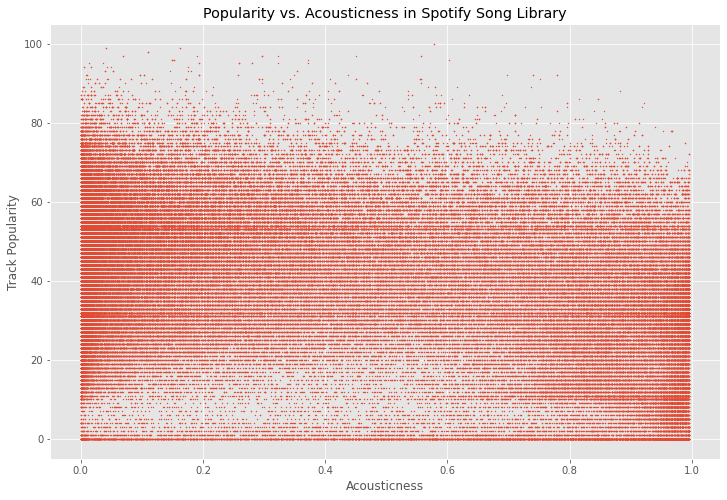

In [59]:
# Creating scatter plots for numeric variables and popularity.

plt.scatter(x = df['acousticness'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Acousticness in Spotify Song Library')

plt.xlabel('Acousticness')

plt.ylabel('Track Popularity')

plt.show() # slight negative correlation

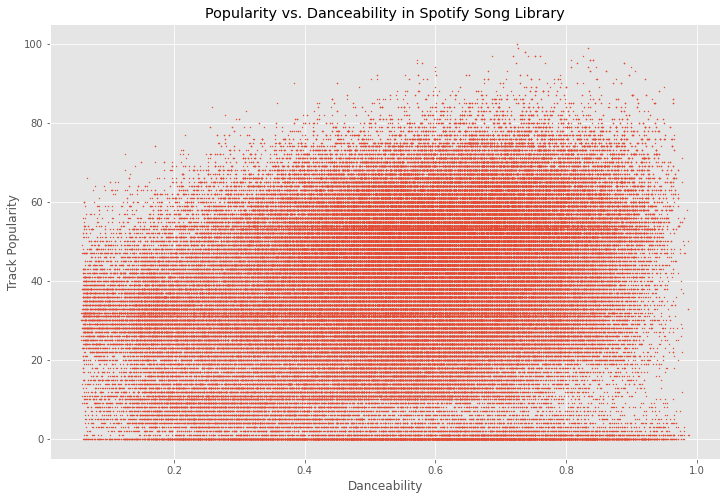

In [60]:
plt.scatter(x = df['danceability'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Danceability in Spotify Song Library')

plt.xlabel('Danceability')

plt.ylabel('Track Popularity')

plt.show() # slight positive correlation

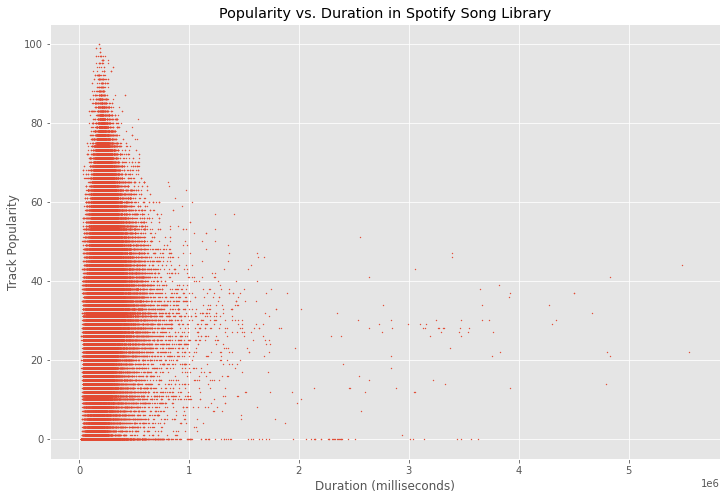

In [61]:
plt.scatter(x = df['duration_ms'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Duration in Spotify Song Library')

plt.xlabel('Duration (milliseconds)')

plt.ylabel('Track Popularity')

plt.show() # shows strong clustering between 0 and 600,000 ms (10 minutes)

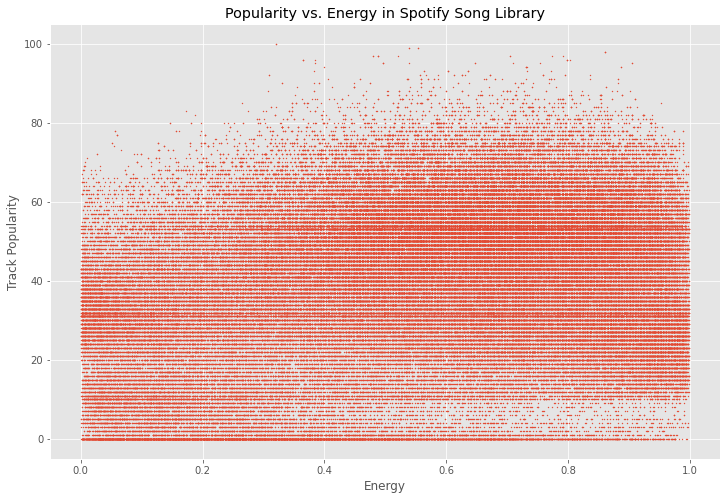

In [62]:
plt.scatter(x = df['energy'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Energy in Spotify Song Library')

plt.xlabel('Energy')

plt.ylabel('Track Popularity')

plt.show() # shows slight positive correlation below 0.7 then a dip from 0.7 to 1.0

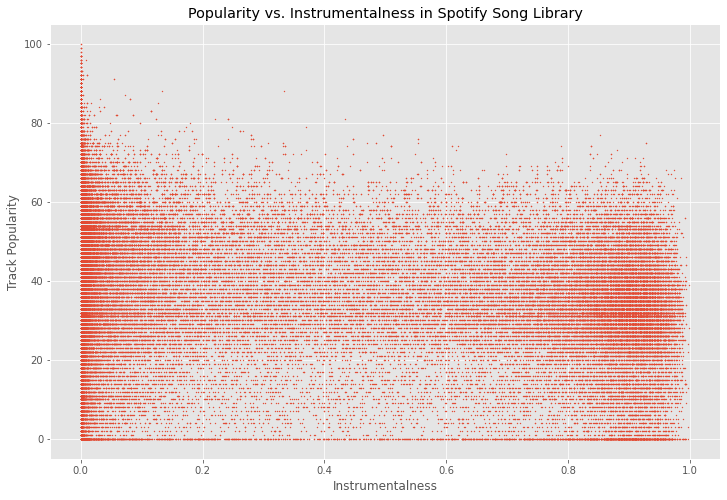

In [63]:
plt.scatter(x = df['instrumentalness'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Instrumentalness in Spotify Song Library')

plt.xlabel('Instrumentalness')

plt.ylabel('Track Popularity')

plt.show() # shows two defined clusters where instrumental songs can be moderately popular, but only non-instrumental songs can be very popular

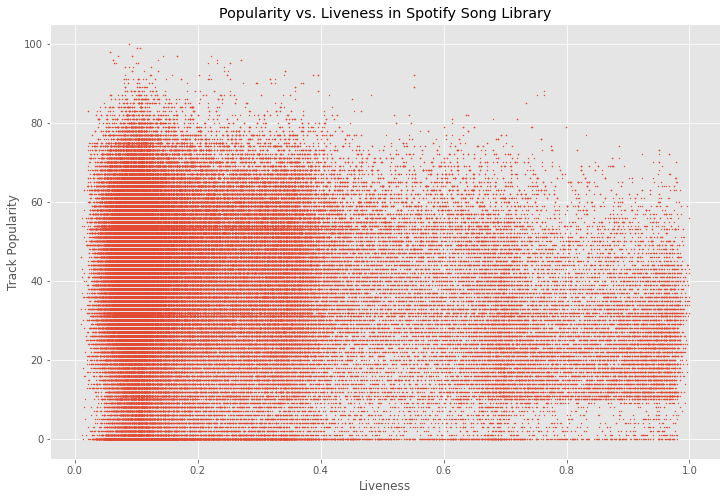

In [64]:
plt.scatter(x = df['liveness'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Liveness in Spotify Song Library')

plt.xlabel('Liveness')

plt.ylabel('Track Popularity')

plt.show() # shows two or more clusters where live-performed songs are less popular than recorded songs

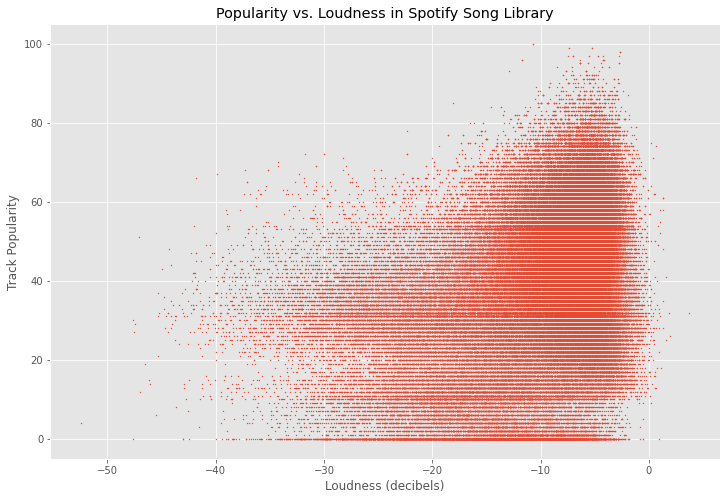

In [65]:
plt.scatter(x = df['loudness'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Loudness in Spotify Song Library')

plt.xlabel('Loudness (decibels)')

plt.ylabel('Track Popularity')

plt.show() # shows that louder songs are generally more popular up to a point (about -3 dB) then become unpopular

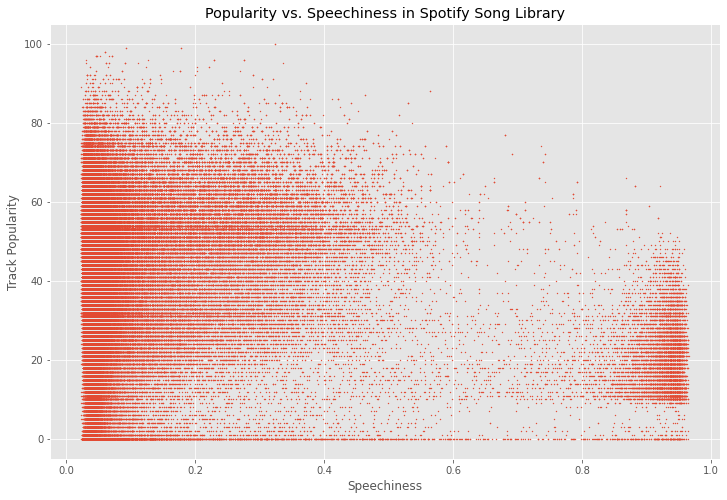

In [66]:
plt.scatter(x = df['speechiness'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Speechiness in Spotify Song Library')

plt.xlabel('Speechiness')

plt.ylabel('Track Popularity')

plt.show() # shows two clusters where speechy tracks can be moderately popular, but most tracks are less speechy and most popular tracks are not speechy

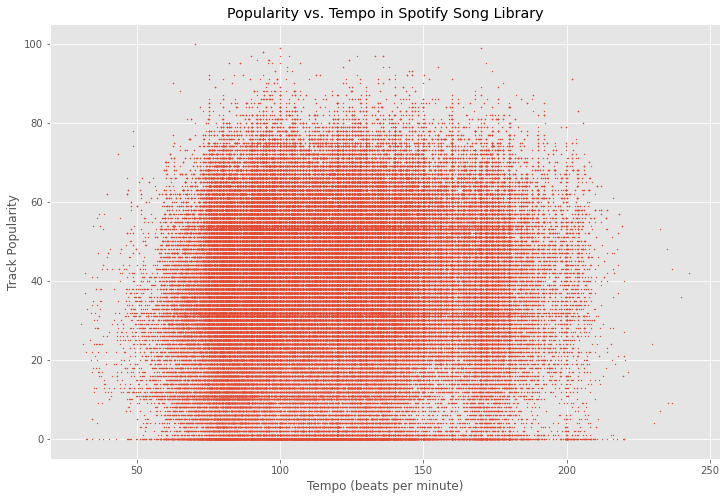

In [67]:
plt.scatter(x = df['tempo'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Tempo in Spotify Song Library')

plt.xlabel('Tempo (beats per minute)')

plt.ylabel('Track Popularity')

plt.show() # shows no correlation

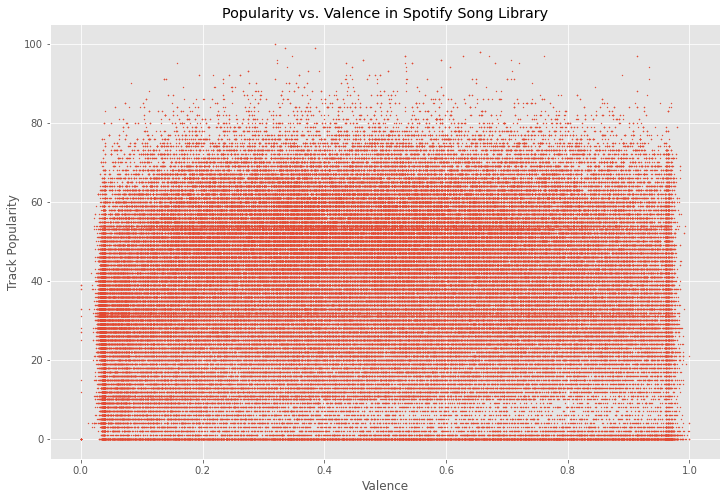

In [68]:
plt.scatter(x = df['valence'], y = df['popularity'], s = 0.8)

plt.title('Popularity vs. Valence in Spotify Song Library')

plt.xlabel('Valence')

plt.ylabel('Track Popularity')

plt.show() # shows no correlation

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

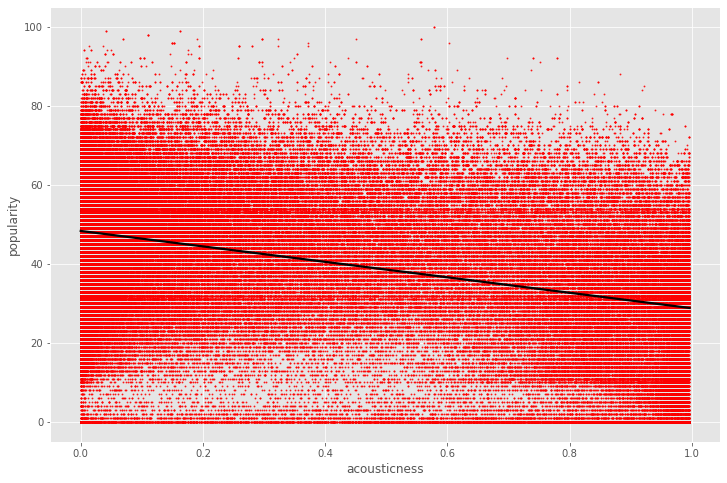

In [69]:
# Creates scatterplot with trendline to show negative correlation.
sns.regplot(x = 'acousticness', y = 'popularity', data = df, scatter_kws = {"color":"red", "s":0.8}, line_kws = {"color":"black"})

In [70]:
# Creates matrix of correlations between numerical variables.
df.corr(method = 'pearson') # pearson, kendall, spearman are other correlation types

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


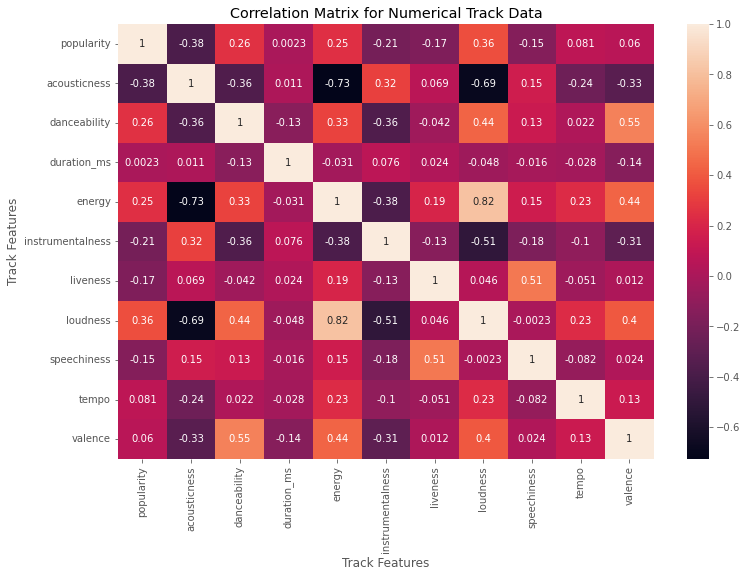

In [71]:
# Creates heatmap to visualize Pearson's correlation coefficient for each column pairing.
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numerical Track Data')

plt.xlabel('Track Features')

plt.ylabel('Track Features')

plt.show()

<AxesSubplot:xlabel='speechiness', ylabel='popularity'>

C:\Users\Solamon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


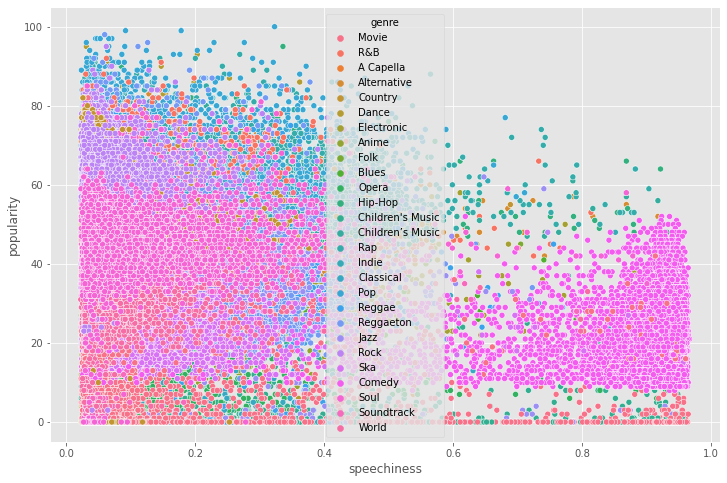

In [119]:
# Creates scatterplot to visualize clusters in speechiness data (certain genres are speechier than others).
sns.scatterplot(x = 'speechiness', y = 'popularity', data = df, hue = 'genre', legend = 'full')

# If you run this before making genre numerical, you can see that the high speechiness cluster belongs to the "Comedy" genre.

<AxesSubplot:xlabel='valence', ylabel='popularity'>

C:\Users\Solamon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


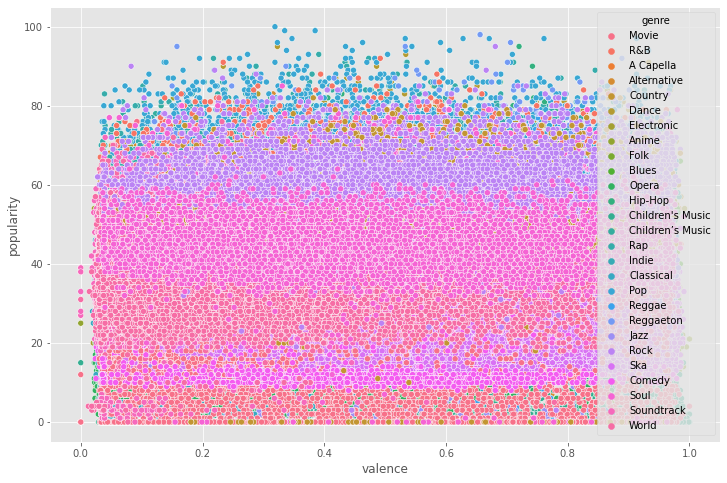

In [120]:
# Creates scatterplot to visualize clusters in valence data (certain genres are more positive than others).
sns.scatterplot(x = 'valence', y = 'popularity', data = df, hue = 'genre', legend = 'full')


<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

C:\Users\Solamon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


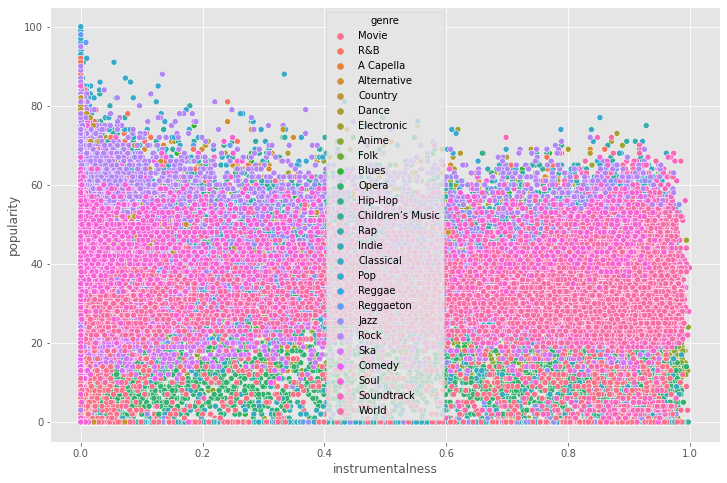

In [128]:
# Creates scatterplot to visualize clusters in instrumentalness data (data does not show strong clustering by genre).
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = df, hue = 'genre', legend = 'full')

In [135]:
# Gives categorical (object-type) columns a number to allow for correlation study between numerical and non-numerical data.
df_numerical = df

for col_name in {'genre', 'key', 'mode', 'time_signature'}:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes

df_numerical.sort_values(by = ['popularity'], inplace = False, ascending = False).head(100) # these Python code blocks were created by Greg Solamon for his Portfolio Project #4

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,8,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,4,0.0884,-10.744,1,0.3230,70.142,3,0.319
107804,16,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.57800,0.725,178640,0.321,0.000000,4,0.0884,-10.744,1,0.3230,70.142,3,0.319
86951,18,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,2,0.1010,-7.399,1,0.1780,99.947,3,0.385
107803,16,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,2,0.1010,-7.399,1,0.1780,99.947,3,0.385
107802,16,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,8,0.1060,-5.290,1,0.0917,169.999,3,0.335
9026,8,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.04210,0.726,190440,0.554,0.000000,8,0.1060,-5.290,1,0.0917,169.999,3,0.335
66643,11,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
107909,16,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
138918,20,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,11,0.0574,-2.652,1,0.0593,93.989,3,0.656
107829,16,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.06910,0.719,187436,0.704,0.000000,4,0.1660,-4.724,0,0.0476,133.002,3,0.628


In [130]:
# Checks to see if df columns were modified from categorical to numerical.
df.loc[df['genre'] == 'R&B'].head(100)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [131]:
# Calculates Pearson correlation coefficient between all columns (even categorical ones) to reveal relationships.
numerical_corr_matrix = df_numerical.corr(method = 'pearson')

corr_pairs = numerical_corr_matrix.unstack()

corr_pairs.head(100)

genre             genre               1.000000
                  popularity          0.096130
                  acousticness       -0.030977
                  danceability        0.000376
                  duration_ms        -0.007706
                  energy             -0.069538
                  instrumentalness    0.043973
                  key                -0.012952
                  liveness           -0.099701
                  loudness           -0.028903
                  mode                0.042377
                  speechiness        -0.144053
                  tempo              -0.014399
                  time_signature      0.027943
                  valence            -0.027961
popularity        genre               0.096130
                  popularity          1.000000
                  acousticness       -0.381295
                  danceability        0.256564
                  duration_ms         0.002348
                  energy              0.248922
             

In [132]:
# Sorted pairs by correlation coefficient.
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(100)

energy            acousticness       -0.725576
acousticness      energy             -0.725576
                  loudness           -0.690202
loudness          acousticness       -0.690202
                  instrumentalness   -0.506320
instrumentalness  loudness           -0.506320
popularity        acousticness       -0.381295
acousticness      popularity         -0.381295
instrumentalness  energy             -0.378957
energy            instrumentalness   -0.378957
instrumentalness  danceability       -0.364941
danceability      instrumentalness   -0.364941
acousticness      danceability       -0.364546
danceability      acousticness       -0.364546
valence           acousticness       -0.325798
acousticness      valence            -0.325798
instrumentalness  valence            -0.307522
valence           instrumentalness   -0.307522
acousticness      tempo              -0.238247
tempo             acousticness       -0.238247
acousticness      time_signature     -0.229082
time_signatur

In [133]:
# Lists high positive correlation pairs (above 0.4).
high_pos_corr = sorted_pairs[(sorted_pairs).between(0.4, 0.999999)]

high_pos_corr.head(100)

valence       energy          0.436771
energy        valence         0.436771
loudness      danceability    0.438668
danceability  loudness        0.438668
speechiness   liveness        0.510147
liveness      speechiness     0.510147
danceability  valence         0.547154
valence       danceability    0.547154
loudness      energy          0.816088
energy        loudness        0.816088
dtype: float64

In [134]:
# Lists high negative correlation pairs (below -0.4).
high_neg_corr = sorted_pairs[(sorted_pairs).between(-0.999999, -0.4)]

high_neg_corr.head(100)

energy            acousticness       -0.725576
acousticness      energy             -0.725576
                  loudness           -0.690202
loudness          acousticness       -0.690202
                  instrumentalness   -0.506320
instrumentalness  loudness           -0.506320
dtype: float64

In [ ]:
# CORRELATION STUDY CONCLUSIONS:
#   1. Higher valence (happier) songs had more energy (r = +0.436771).
#   2. Louder songs were more danceable (r = +0.438668).
#   3. Live-sounding tracks were speechier (r = +0.510147).
#   4. Higher valence (happier) songs were more danceable (r = +0.547154).
#   5. Louder songs had higher energy (r = +0.816088).
#   6. Acoustic songs had lower energy (r = -0.725576).
#   7. Acoustic songs were less loud (r = -0.690202).
#   8. Instrumental songs were less loud (r = -0.506320).
#   9. Speechiness showed strong clustering by genre.
#   10. Instrumentalness did not show clustering by genre.